# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
# Print dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [6]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [8]:
# Drop na
dataset = dataset.dropna()

print(dataset.shape)


(150, 5)


3. Encoding the class label categorical column: from string to num


In [9]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

/var/folders/6n/1vlyyhgn63v0v_mw13s51df80000gn/T/ipykernel_68470/252957063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

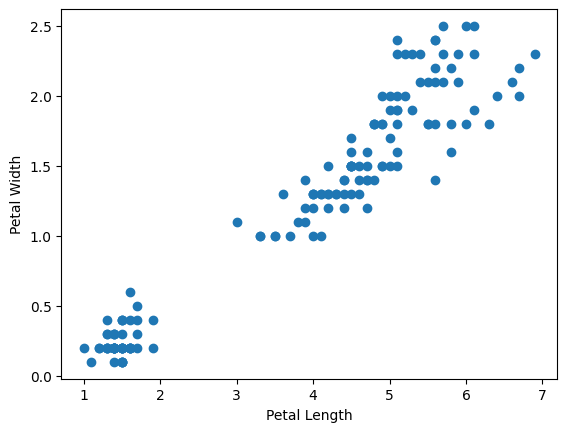

In [ ]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


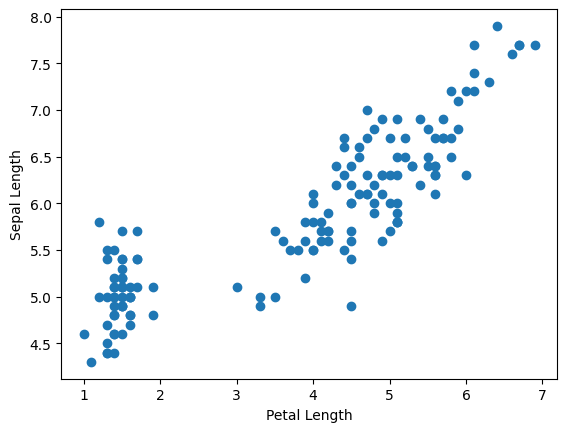

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


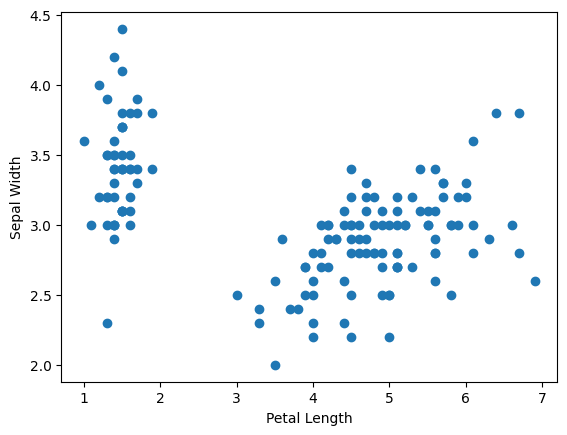

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


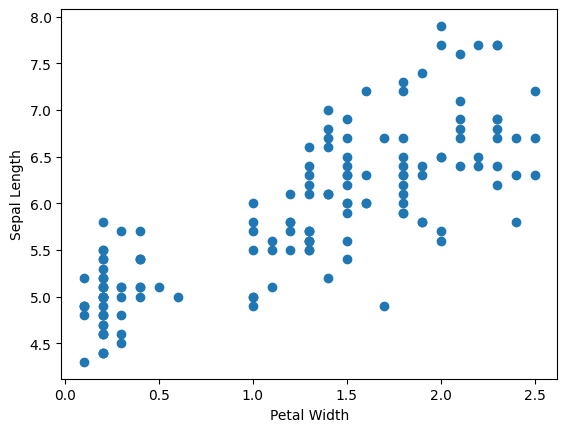

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


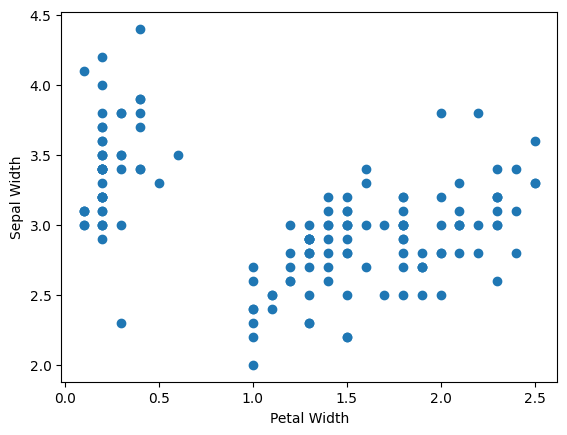

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


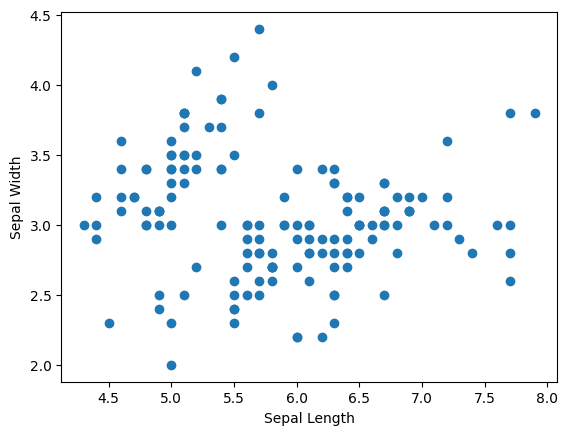

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


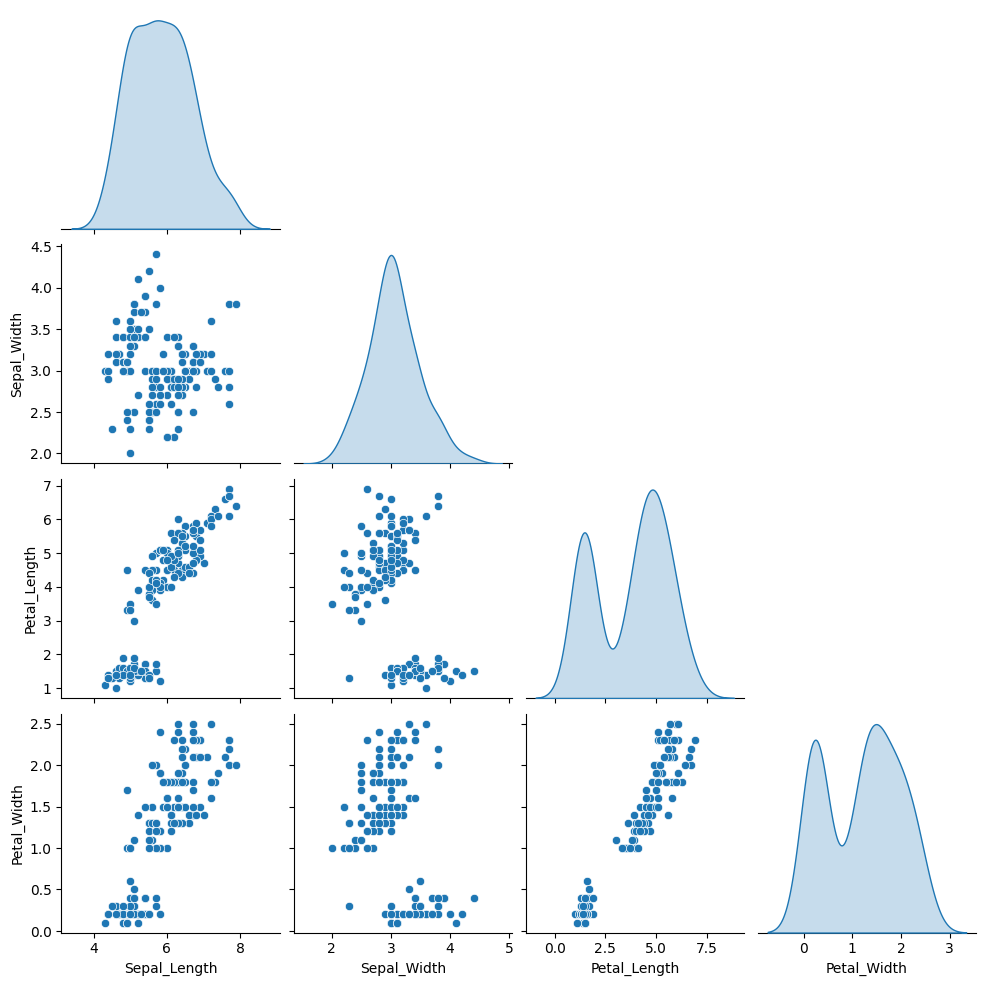

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


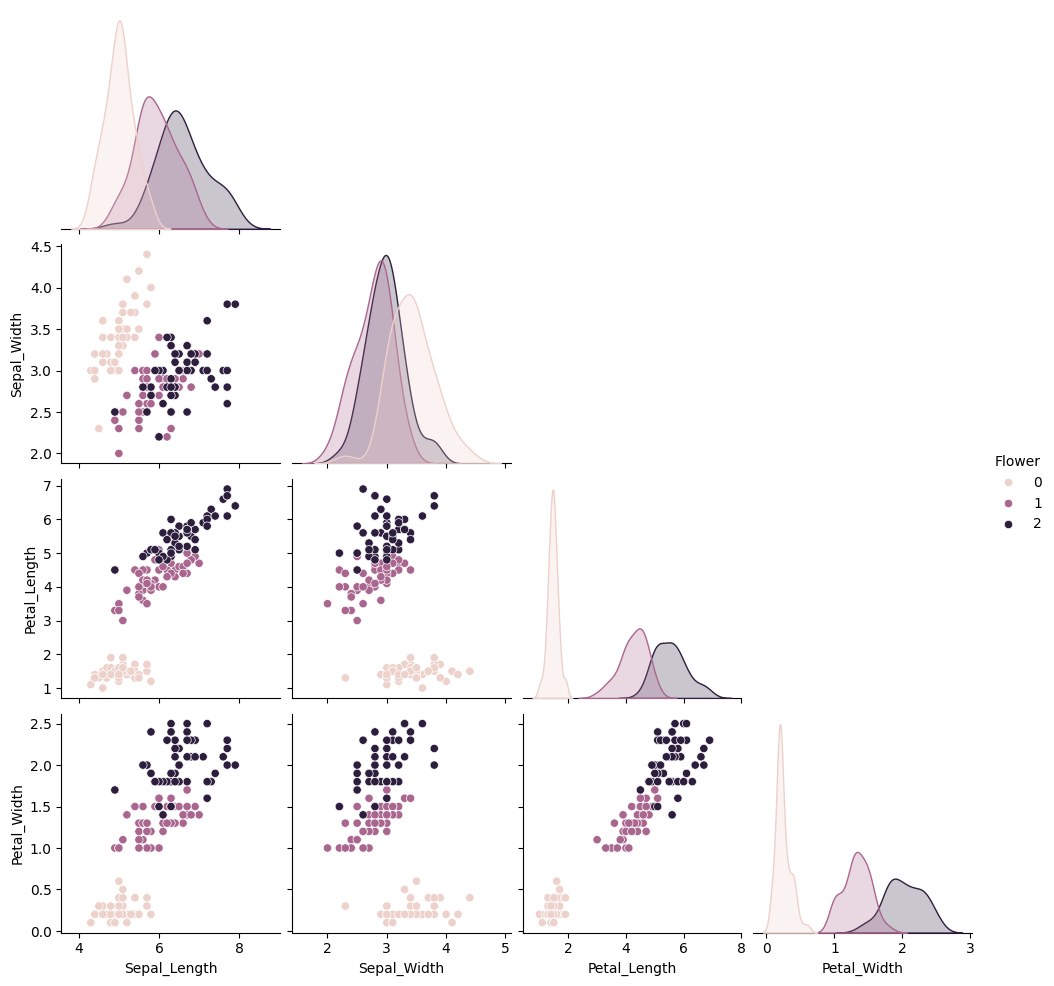

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [10]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


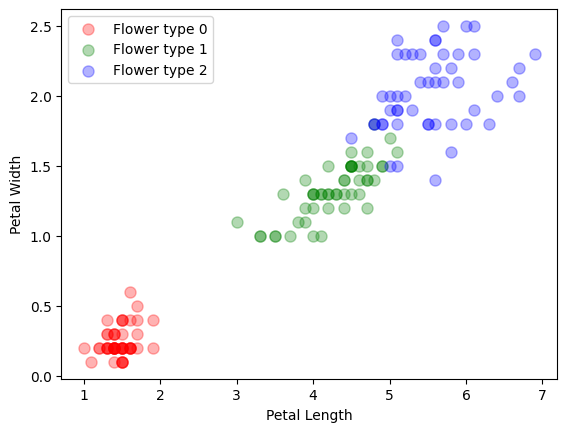

In [11]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


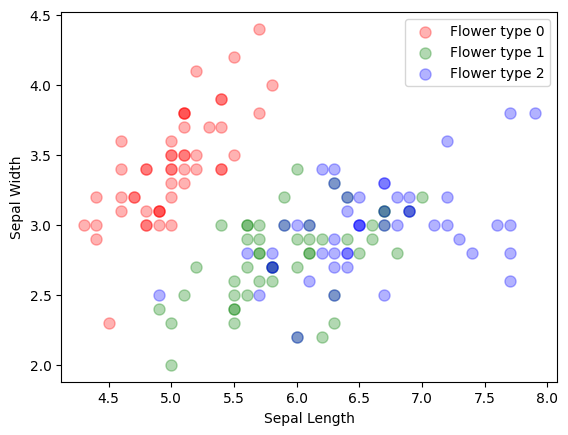

In [ ]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Calculate the statistical summary for each quantitative variables. Explain the results
    - Identify the name of each column
    - Identify the type of each column
    - Minimum, maximum, mean, average, median, standar deviation
    
    
2. Are there missing data? If so, create a new dataset containing only the rows with the non-missing data


3. Create a new dataset containing only the petal width and length and the type of Flower


4. Create a new dataset containing only the setal width and length and the type of Flower


5. Create a new dataset containing the setal width and length and the type of Flower encoded as a categorical numerical column


In [15]:
#1
print(dataset.columns)
print(dataset.dtypes)
print(dataset.describe())

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')
Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower            int64
dtype: object
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width      Flower
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [ ]:
#2
#No missing data

In [28]:
# #3
dataset = dataset.replace({"Flower":  {0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"} })
iris_petal_data = dataset[["Petal_Length", "Petal_Width", "Flower"]]
iris_petal_data


,Petal_Length,Petal_Width,Flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [29]:
#4
iris_sepal_data = dataset[["Sepal_Length", "Sepal_Width", "Flower"]]
iris_sepal_data

,Sepal_Length,Sepal_Width,Flower
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


In [30]:

#5
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
iris_sepal_data2 = dataset[["Sepal_Length", "Sepal_Width", "Flower"]]
iris_sepal_data2

/var/folders/6n/1vlyyhgn63v0v_mw13s51df80000gn/T/ipykernel_68470/1974558935.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Flower
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


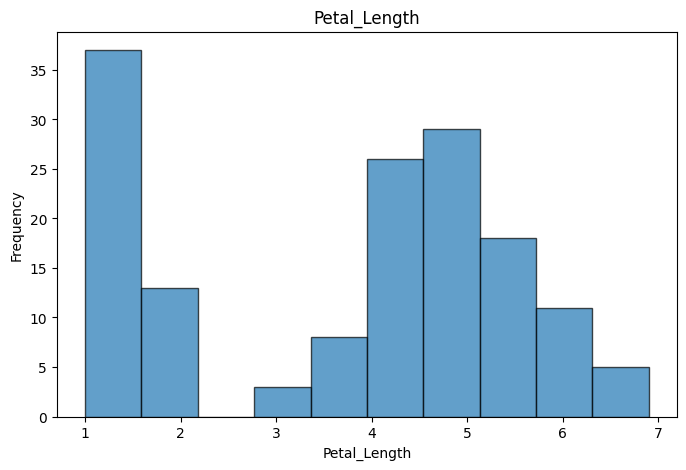

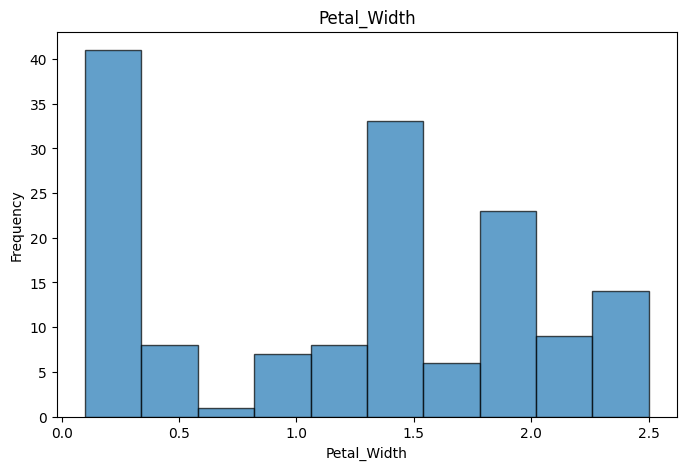

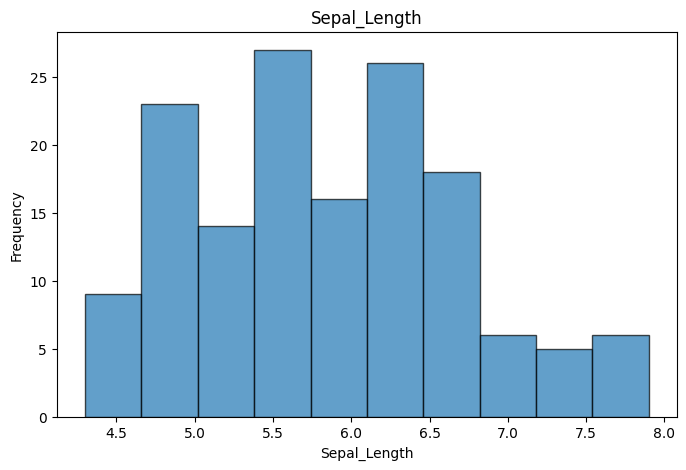

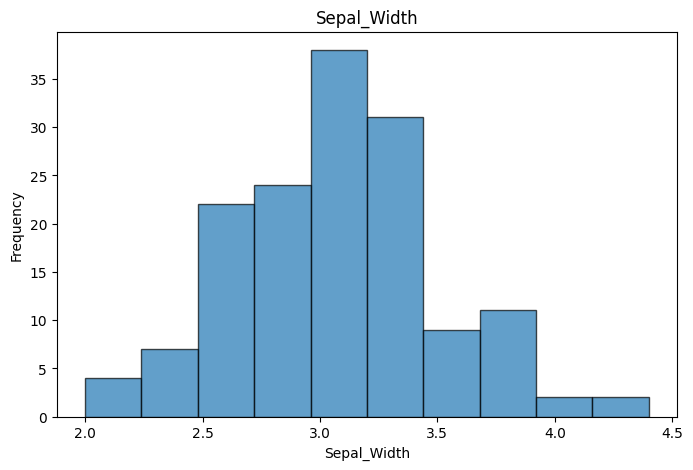

In [40]:
#1
histogram = dataset["Petal_Length"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("Petal_Length")
histogram.set_ylabel("Frequency")
histogram.set_title("Petal_Length")
plt.show()

histogram = dataset["Petal_Width"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("Petal_Width")
histogram.set_ylabel("Frequency")
histogram.set_title("Petal_Width")
plt.show()

histogram = dataset["Sepal_Length"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("Sepal_Length")
histogram.set_ylabel("Frequency")
histogram.set_title("Sepal_Length")
plt.show()

histogram = dataset["Sepal_Width"].plot(kind="hist", bins=10, edgecolor="black", alpha=0.7, figsize=(8,5))
histogram.set_xlabel("Sepal_Width")
histogram.set_ylabel("Frequency")
histogram.set_title("Sepal_Width")
plt.show()


In [ ]:
#2
# Done in #1

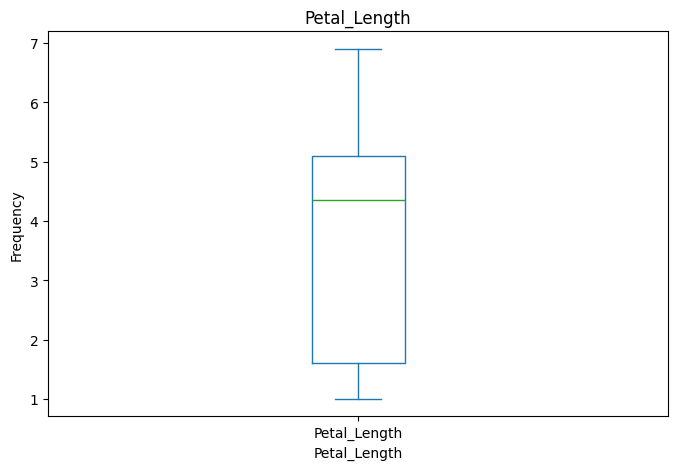

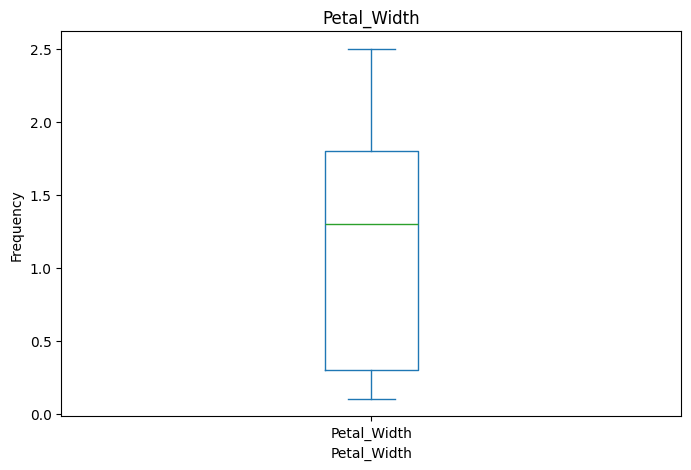

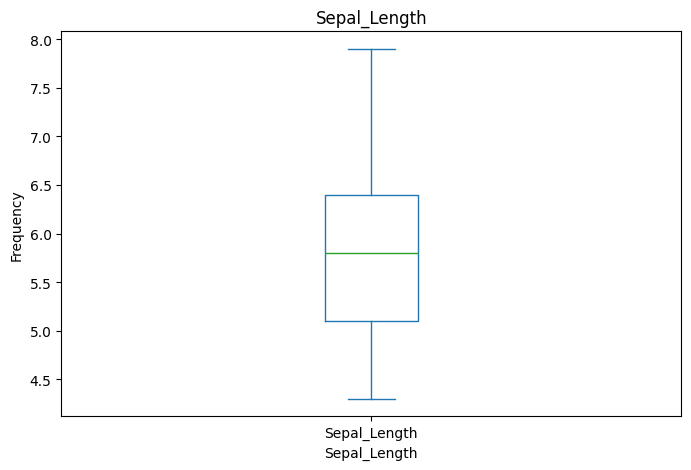

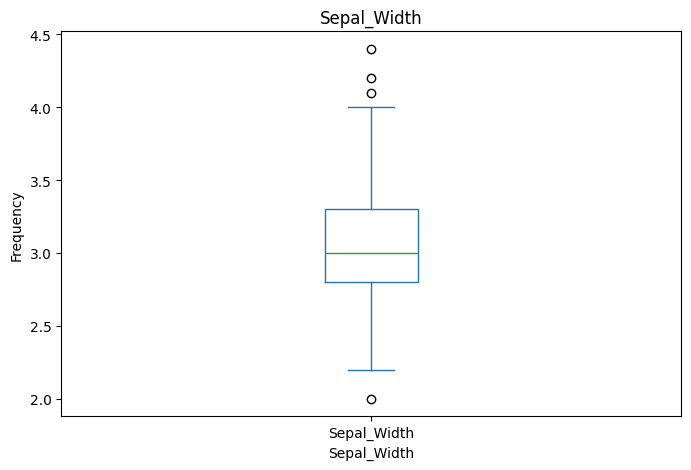

In [43]:
#3
boxplot = dataset["Petal_Length"].plot(kind="box", figsize=(8,5))
boxplot.set_xlabel("Petal_Length")
boxplot.set_ylabel("Frequency")
boxplot.set_title("Petal_Length")
plt.show()

boxplot = dataset["Petal_Width"].plot(kind="box", figsize=(8,5))
boxplot.set_xlabel("Petal_Width")
boxplot.set_ylabel("Frequency")
boxplot.set_title("Petal_Width")
plt.show()

boxplot = dataset["Sepal_Length"].plot(kind="box", figsize=(8,5))
boxplot.set_xlabel("Sepal_Length")
boxplot.set_ylabel("Frequency")
boxplot.set_title("Sepal_Length")
plt.show()

boxplot = dataset["Sepal_Width"].plot(kind="box", figsize=(8,5))
boxplot.set_xlabel("Sepal_Width")
boxplot.set_ylabel("Frequency")
boxplot.set_title("Sepal_Width")
plt.show()

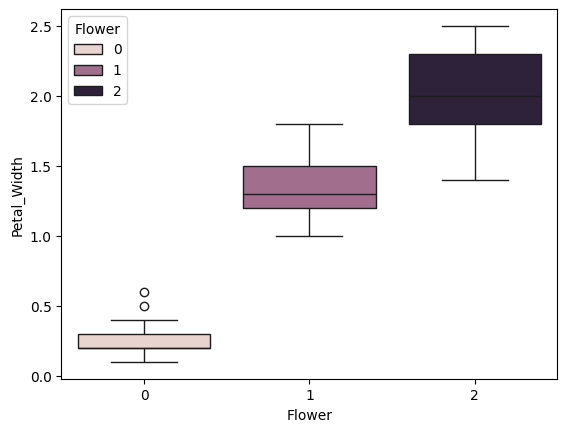

In [50]:
#4
sns.boxplot(data=dataset, x="Flower", y="Petal_Width", hue="Flower")
plt.show()

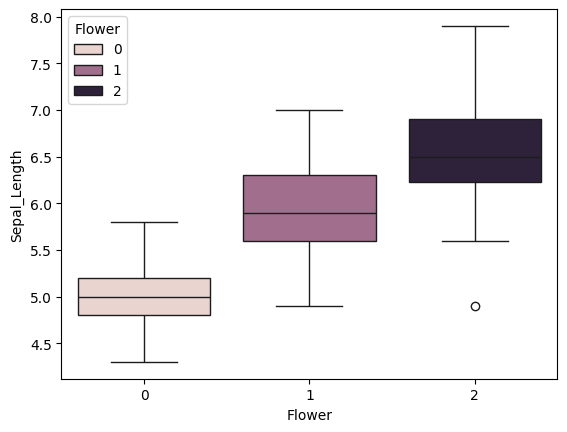

In [49]:
#5
sns.boxplot(data=dataset, x="Flower", y="Sepal_Length", hue="Flower")
plt.show()

In [ ]:
#6
#Petal_Length
# Describe el largo de la medida de los pétalos de una flor, guarda una relación proporcional con el ancho.

#Petal_Width
# Describe el ancho de los pétalos de una flor, guarda la misma relación con el largo.

#Sepal_Length
# Describe el largo de el sépalo de la flor, depende del tipo de la flor el tipo de relación que guarda con el ancho, así mismo la relación que tiene con el tamaño del pétalo

#Sepal_Width
# Describe el ancho del sépalo y tiene la misma relación descrita en el largo

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
